In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

dataframe =pd.read_csv('C:/Users\BMS/Desktop/Project_Coding/diabetes.csv')
dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Preprocessing of Data

In [3]:
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dataframe.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


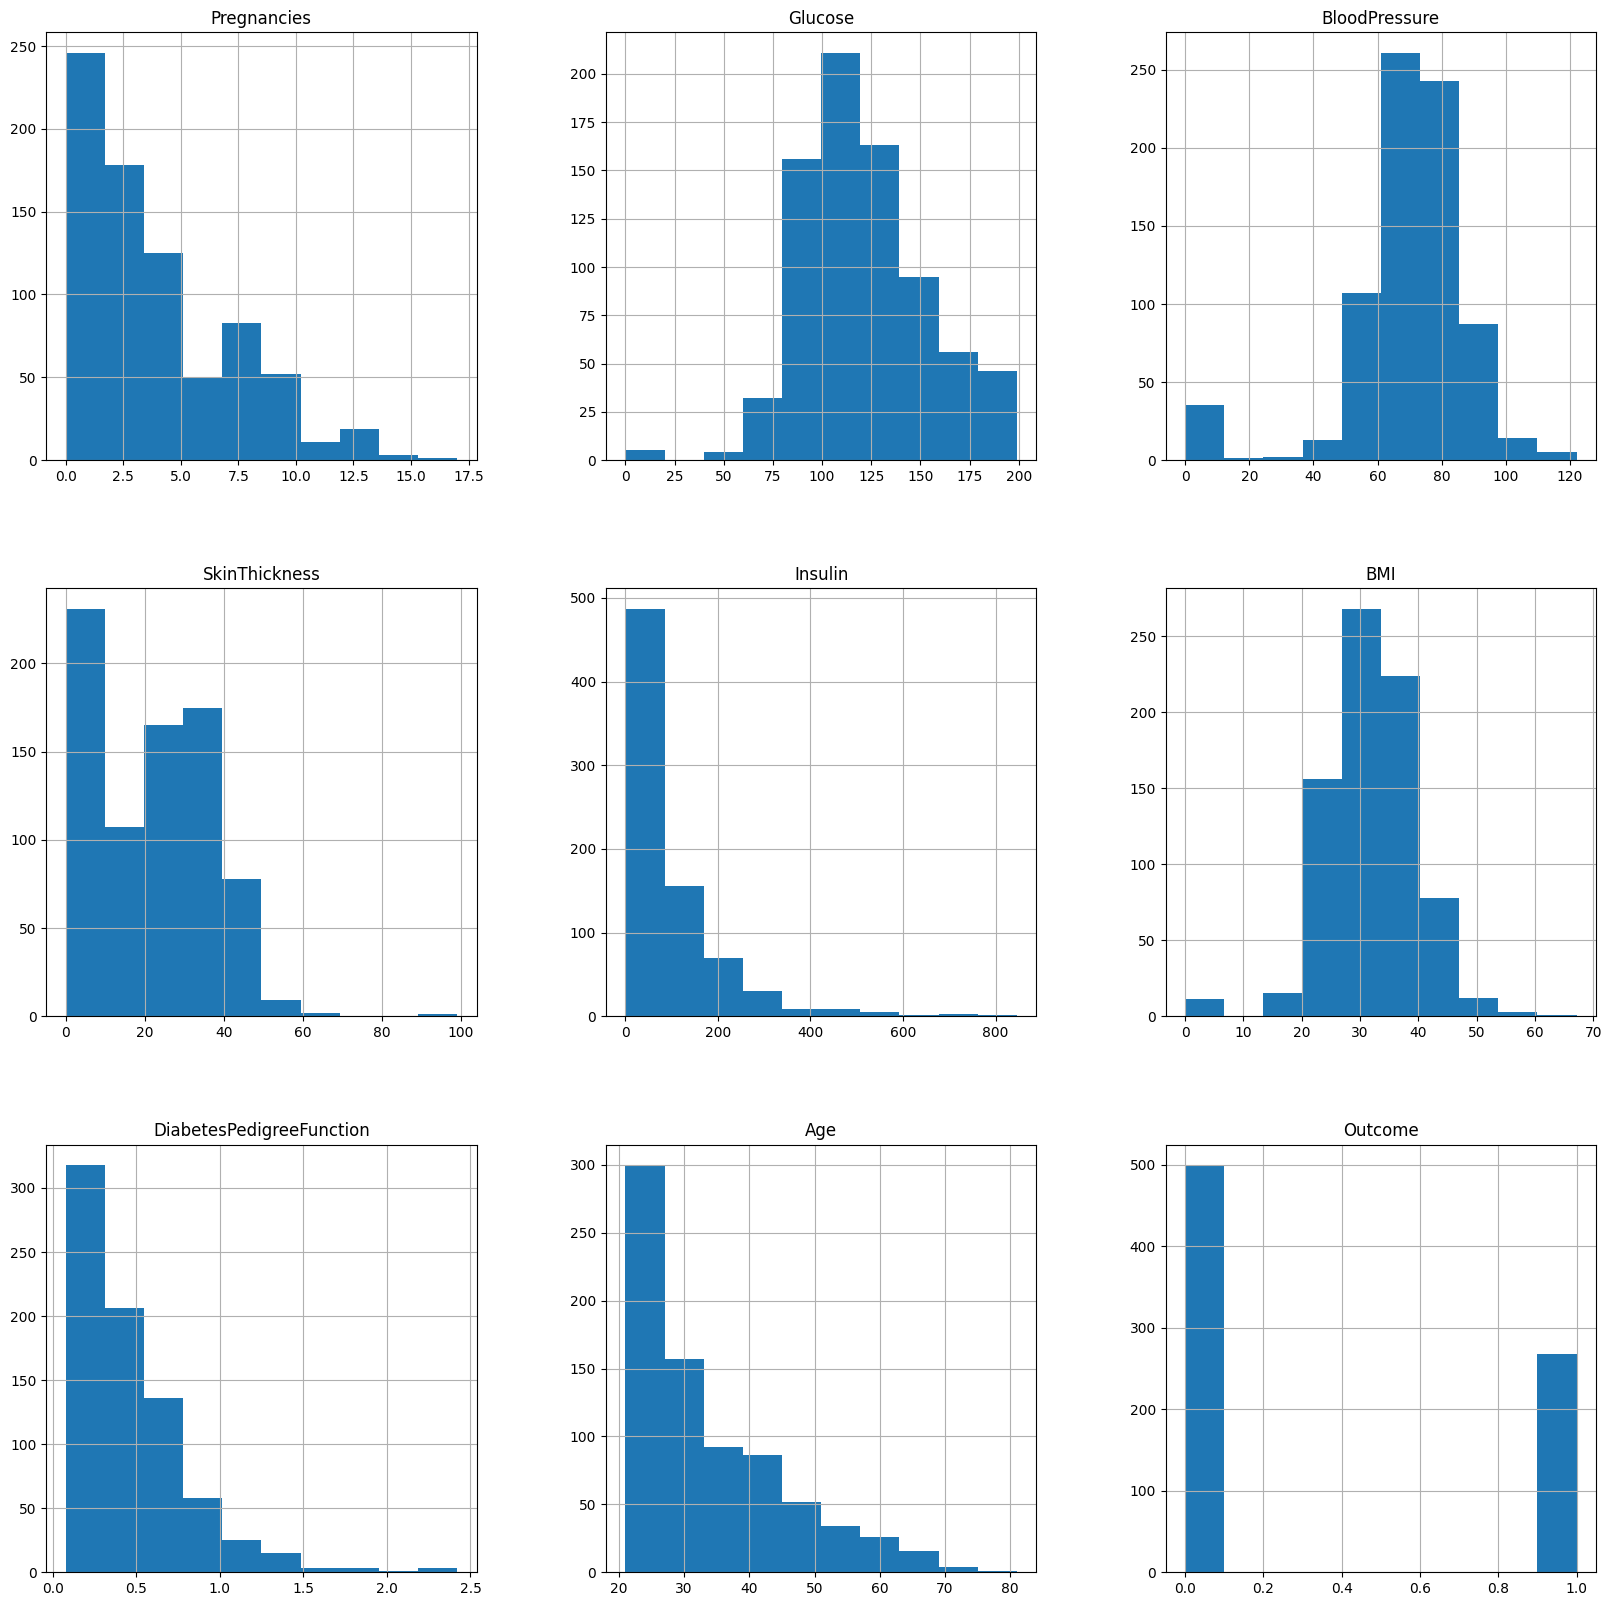

In [6]:
p=dataframe.hist(figsize=(20,20))

<Axes: >

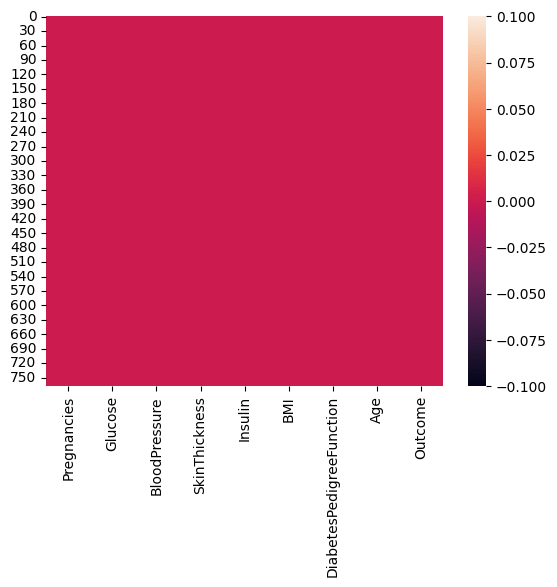

In [7]:
sns.heatmap(dataframe.isnull())

In [8]:
correlation=dataframe.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<Axes: >

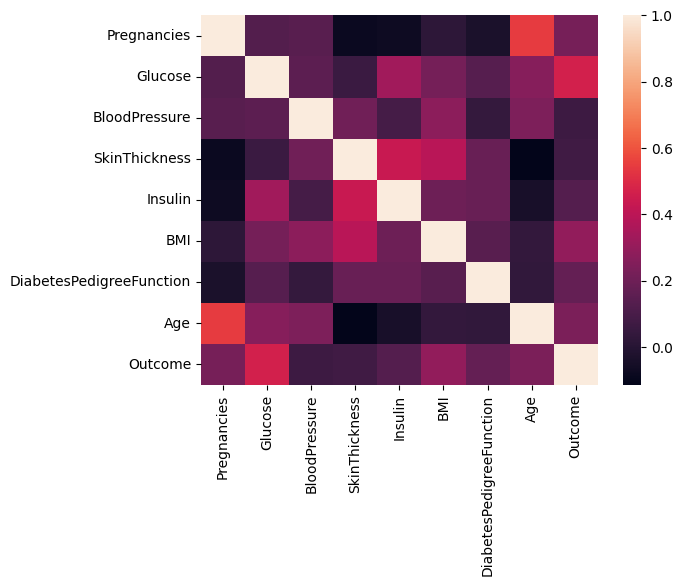

In [9]:
sns.heatmap(correlation)

Model Building
Splitting the Dataset

In [10]:
x=dataframe.drop("Outcome",axis=1)
y=dataframe['Outcome']
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=7)
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
289,5,108,72,43,75,36.1,0.263,33
328,2,102,86,36,120,45.5,0.127,23
394,4,158,78,0,0,32.9,0.803,31
321,3,112,74,30,0,31.6,0.197,25
326,1,122,64,32,156,35.1,0.692,30
...,...,...,...,...,...,...,...,...
579,2,197,70,99,0,34.7,0.575,62
502,6,0,68,41,0,39.0,0.727,41
537,0,57,60,0,0,21.7,0.735,67
196,1,105,58,0,0,24.3,0.187,21


Building Model using Random forest

In [11]:
rfc= RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)



RandomForestClassifier(n_estimators=200)

Checking accuracy of Random Forest

In [12]:
from sklearn import metrics
predictions=rfc.predict(x_test)
print("Accuracy:", format(metrics.accuracy_score(y_test,predictions)*100)+' %')

Accuracy: 81.81818181818183 %


In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[88  9]
 [19 38]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        97
           1       0.81      0.67      0.73        57

    accuracy                           0.82       154
   macro avg       0.82      0.79      0.80       154
weighted avg       0.82      0.82      0.81       154



Checking accuracy of Logistic Regression

In [14]:
model=LogisticRegression(solver='lbfgs',max_iter=400)
model.fit(x_train,y_train)

LogisticRegression(max_iter=400)

In [15]:
predictions=model.predict(x_test)
accuracy=str(accuracy_score(y_test,predictions)*100)+' %'
print("Accuracy: "+accuracy)


Accuracy: 79.22077922077922 %


Building Model using Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [17]:
from sklearn import metrics
d_predictions=dtree.predict(x_test)
print("Accuracy:",format(metrics.accuracy_score(y_test,d_predictions)*100)+' %')

Accuracy: 74.02597402597402 %


In [18]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,d_predictions))
print(classification_report(y_test,d_predictions))

[[79 18]
 [22 35]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.80        97
           1       0.66      0.61      0.64        57

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.74      0.74       154



Building Model using XGBoost

In [19]:
from xgboost import XGBClassifier

xgb_model=XGBClassifier(gamma=0)
xgb_model.fit(x_train,y_train)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
from sklearn import metrics
xgb_pred=xgb_model.predict(x_test)
print("Accuracy:",format(metrics.accuracy_score(y_test,xgb_pred)*100)+' %')

Accuracy: 74.02597402597402 %


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,xgb_pred))
print(classification_report(y_test,xgb_pred))

[[81 16]
 [24 33]]
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        97
           1       0.67      0.58      0.62        57

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



Building the Model using Support Vection Machine

In [ ]:
from sklearn.svm import SVC
svc_model=SVC()
svc_model.fit(x_train,y_train)

svc_pred=svc_model.predict(x_test)

from sklearn import metrics
print("Accuracy:",format(metrics.accuracy_score(y_test,svc_pred)*100)+' %')

Accuracy: 77.27272727272727 %


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

[[91  6]
 [29 28]]
              precision    recall  f1-score   support

           0       0.76      0.94      0.84        97
           1       0.82      0.49      0.62        57

    accuracy                           0.77       154
   macro avg       0.79      0.71      0.73       154
weighted avg       0.78      0.77      0.76       154

